# Time Series Anomaly Detection

## Exercises

Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.

In [44]:
# Import libraries
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  metrics
import  env
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import customed functions
from wrangle import parse_curriculum_access_data

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# Set min fig sizes
from cycler import cycler
plt.rcParams["figure.figsize"] = (16,5)
plt.rcParams['axes.facecolor']='#FFF'
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.prop_cycle'] = cycler(color=['g', 'r', 'b', 'y'])

#### Acquire data

In [45]:
# function calls the acquire modules to get data and do some prepare functions 

df = parse_curriculum_access_data()

In [46]:
# Inspect data 
df.head()

,date,time,page,id,cohort,ip
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [47]:
# Resample page col by day and count (note name difference)

pages = df['page'].resample('D').count()

In [48]:
pages.head()

2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: page, dtype: int64

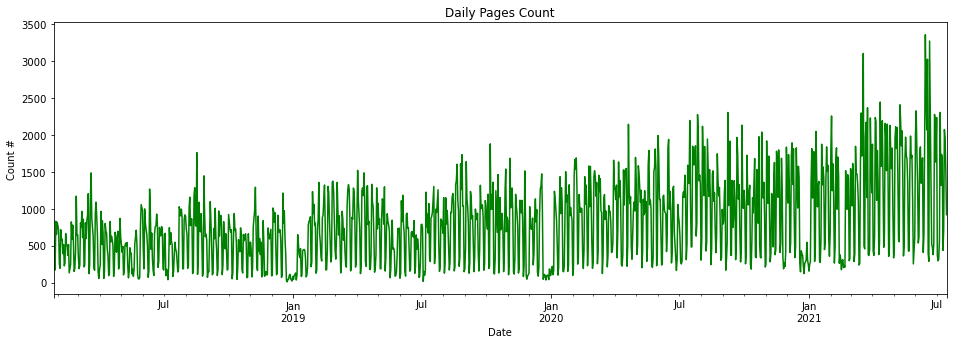

In [49]:
pages.plot()
plt.title('Daily Pages Count')
plt.xlabel('Date')
plt.ylabel('Count #')
None

### Exponential Moving Average (EMA)
>- Limitations- SMA values lag the original. Changes only seen with delay of L units
>- EMA helps reduce lag by use of SMA- applies more weight on recent observations(SMA weights all obsevations)

EMAt = α ∗ (t0 − EMAt−1) + EMAt−1 
- M = Number of time periods, span of the window

- t0 = Latest value

- t−1 = Previous value
- EMAt − 1 = Exponential moving average of previous day.

- The multiplier: 
    α=2 = (2 / (M+1))

- M = span argument = number of time periods. (We will try 7 days, 14 days, and 30 days).

Notice how there are no missing values. __ewm()__ will use as many values are available to compute the mean. So if the span is 7 days, but it is on the first day of data available, the EMA will equal the first value.

In [50]:
# 7 day EMA

ema_7d = pages.ewm(span = 7).mean()
ema_7d

2018-01-26     572.000000
2018-01-27     376.571429
2018-01-28     287.243243
2018-01-29     485.737143
2018-01-30     540.235595
                 ...     
2021-07-11    1066.269733
2021-07-12    1317.952300
2021-07-13    1477.464225
2021-07-14    1492.598169
2021-07-15    1349.198627
Freq: D, Name: page, Length: 1267, dtype: float64

In [51]:
# two weeks day EMA

ema_14d = pages.ewm(span = 14).mean()
ema_14d.head()

2018-01-26    572.000000
2018-01-27    388.785714
2018-01-28    305.208829
2018-01-29    465.757252
2018-01-30    514.347700
Freq: D, Name: page, dtype: float64

In [52]:
# 3 months (90 days) day EMA

ema_30d = pages.ewm(span = 30).mean()
ema_30d.head()

2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: page, dtype: float64

In [53]:
# 3 months (90 days) day EMA

ema_90d = pages.ewm(span = 90).mean()
ema_90d.head()

2018-01-26    572.000000
2018-01-27    399.100000
2018-01-28    321.030081
2018-01-29    452.545042
2018-01-30    494.228442
Freq: D, Name: page, dtype: float64

### Plot ewm

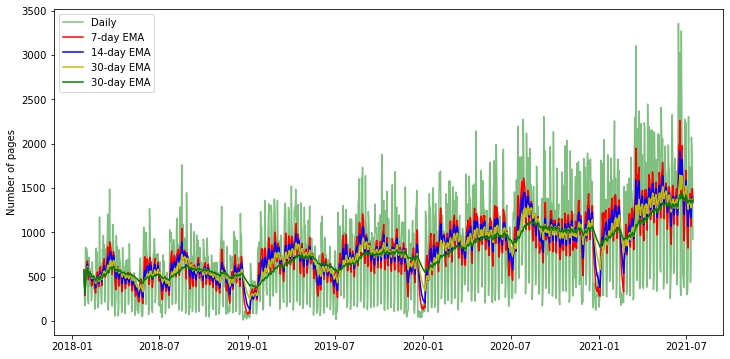

In [54]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pages.index, pages, label='Daily', alpha=.5)

ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_90d, label = '30-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()
